<a href="https://colab.research.google.com/github/MathieuForge/Baby_makers/blob/main/test_moneyradar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Moneyradar/nvidia_gold_bitcoin.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1597 non-null   object 
 1   Rendement_Bitcoin  1597 non-null   float64
 2   Rendement_gold     1139 non-null   float64
 3   Rendement_nvidia   1099 non-null   float64
dtypes: float64(3), object(1)
memory usage: 50.0+ KB


In [ ]:
df['Date']=pd.to_datetime(df.Date)

In [ ]:
df=df.fillna(method='backfill')
df=df.fillna(method='ffill')

In [ ]:
rendement_columns = ['Rendement_Bitcoin', 'Rendement_gold', 'Rendement_nvidia']
df[rendement_columns] = df[rendement_columns] - 100

In [ ]:
df.tail()

,Date,Rendement_Bitcoin,Rendement_gold,Rendement_nvidia
1592,2024-05-11,744.837357,54.862247,1407.152384
1593,2024-05-12,753.912609,54.862247,1407.152384
1594,2024-05-13,774.152060,53.327662,1407.152384
1595,2024-05-14,755.154310,54.433610,1423.107703
1596,2024-05-15,761.164199,54.885151,1423.107703


In [ ]:
print(df[df.Rendement_nvidia.isnull()])

Empty DataFrame
Columns: [Date, Rendement_Bitcoin, Rendement_gold, Rendement_nvidia]
Index: []


In [ ]:
!pip install plotly

V1

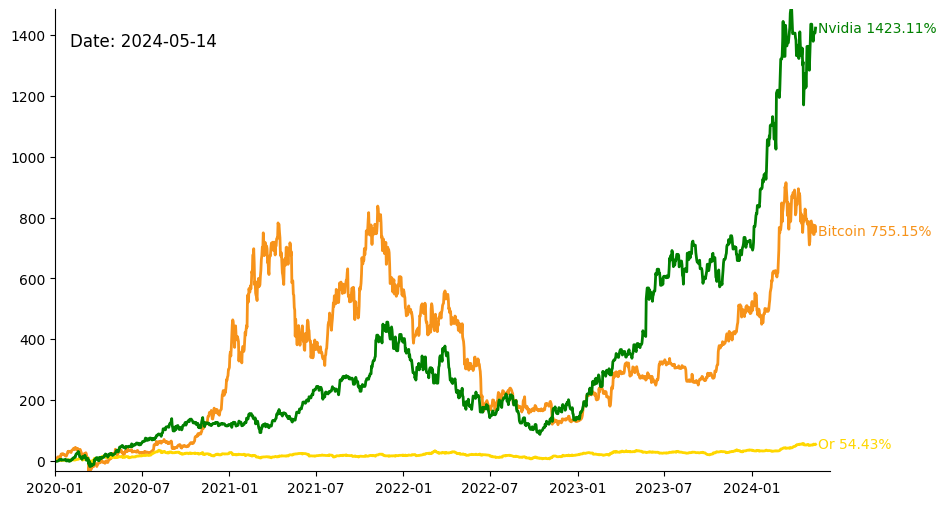

In [ ]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assurez-vous d'avoir un DataFrame df avec les colonnes 'Date', 'Rendement_Bitcoin', 'Rendement_gold', et 'Rendement_nvidia'

# # Préparer les données pour l'animation
# x_data = df['Date']
# y_data_bitcoin = df['Rendement_Bitcoin']
# y_data_gold = df['Rendement_gold']
# y_data_nvidia = df['Rendement_nvidia']

# # Calculer la période de six mois
# six_months = pd.Timedelta(days=30*6)
# end_initial_period = x_data.min() + six_months

# # Créer la figure et les axes
# fig, ax = plt.subplots(figsize=(10, 6))  # Ajuster la taille de la figure
# line_bitcoin, = ax.plot([], [], label='Bitcoin', lw=2, color='#f7931a')  # Couleur Bitcoin (orange)
# line_gold, = ax.plot([], [], label='Gold', lw=2, color='gold')  # Couleur Or
# line_nvidia, = ax.plot([], [], label='Nvidia', lw=2, color='green')  # Couleur Nvidia (vert)

# # Enlever les cadres en haut et à gauche
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Créer les cercles pour représenter les marqueurs
# circle_bitcoin = plt.Circle((0, 0), 0.6, color='#f7931a', fill=True)  # Réduire la taille des cercles de moitié
# circle_gold = plt.Circle((0, 0), 0.6, color='gold', fill=True)
# circle_nvidia = plt.Circle((0, 0), 0.6, color='green', fill=True)

# # Ajouter les cercles aux axes
# ax.add_patch(circle_bitcoin)
# ax.add_patch(circle_gold)
# ax.add_patch(circle_nvidia)

# # Créer les annotations de pourcentage (initialisées vides)
# text_bitcoin = ax.text(0, 0, '', ha='left', va='center', color='#f7931a')  # Match color with line
# text_gold = ax.text(0, 0, '', ha='left', va='center', color='gold')
# text_nvidia = ax.text(0, 0, '', ha='left', va='center', color='green')

# # Créer l'annotation pour la date
# date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12, color='black')

# # Initialiser la fonction pour la configuration de l'animation
# def init():
#     line_bitcoin.set_data([], [])
#     line_gold.set_data([], [])
#     line_nvidia.set_data([], [])
#     ax.set_xlim(x_data.min(), end_initial_period)  # Initialiser avec les six premiers mois
#     ax.set_ylim(min(y_data_bitcoin.min(), y_data_gold.min(), y_data_nvidia.min()) - 1,
#                 max(y_data_bitcoin.max(), y_data_gold.max(), y_data_nvidia.max()) + 1)
#     date_text.set_text('')
#     return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# # Fonction pour mettre à jour l'animation
# def update(frame):
#     x = x_data[:frame]
#     y_bitcoin = y_data_bitcoin[:frame]
#     y_gold = y_data_gold[:frame]
#     y_nvidia = y_data_nvidia[:frame]

#     line_bitcoin.set_data(x, y_bitcoin)
#     line_gold.set_data(x, y_gold)
#     line_nvidia.set_data(x, y_nvidia)

#     if frame > 0:
#         circle_bitcoin.set_center((x[frame - 1], y_bitcoin[frame - 1]))
#         circle_gold.set_center((x[frame - 1], y_gold[frame - 1]))
#         circle_nvidia.set_center((x[frame - 1], y_nvidia[frame - 1]))

#         # Mettre à jour les annotations de valeurs à droite des cercles
#         text_bitcoin.set_position((x[frame - 1] + pd.Timedelta(days=5), y_bitcoin[frame - 1]))
#         text_gold.set_position((x[frame - 1] + pd.Timedelta(days=5), y_gold[frame - 1]))
#         text_nvidia.set_position((x[frame - 1] + pd.Timedelta(days=5), y_nvidia[frame - 1]))

#         text_bitcoin.set_text(f'Bitcoin {y_bitcoin[frame-1]:.2f}%')
#         text_gold.set_text(f'Or {y_gold[frame-1]:.2f}%')
#         text_nvidia.set_text(f'Nvidia {y_nvidia[frame-1]:.2f}%')

#     # Mettre à jour le texte de la date
#     if len(x) > 0:
#         date_text.set_text(f'Date: {x[frame - 1].strftime("%Y-%m-%d")}')
#         if x[frame - 1] > end_initial_period:
#             ax.set_xlim(x_data.min(), x_data[:frame].max() + pd.Timedelta(days=30))  # Ajouter une marge à droite après les six premiers mois
#         ax.set_ylim(min(y_bitcoin.min(), y_gold.min(), y_nvidia.min()) - 1,
#                     max(y_bitcoin.max(), y_gold.max(), y_nvidia.max()) + 1)
#     return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# # Créer l'animation avec des ajustements supplémentaires pour la fluidité
# ani = FuncAnimation(fig, update, frames=len(x_data), init_func=init, blit=True, interval=10, repeat=False)

# # Enregistrer l'animation en tant que fichier vidéo
# ani.save('rendements.mp4', writer='ffmpeg')

# # Afficher l'animation dans le notebook
# HTML('<video controls src="rendements.mp4" type="video/mp4">')


**TEST**

NameError: name 'mpimg' is not defined

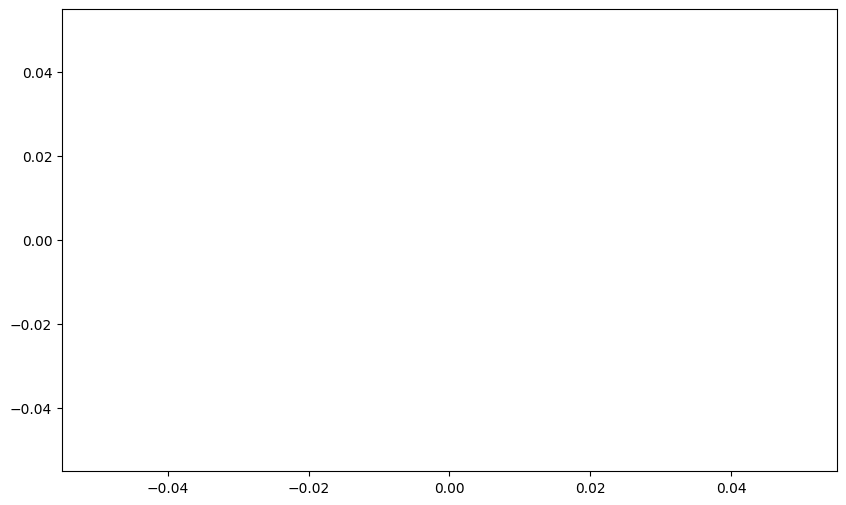

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd

# Assurez-vous d'avoir un DataFrame df avec les colonnes 'Date', 'Rendement_Bitcoin', 'Rendement_gold', et 'Rendement_nvidia'

# Préparer les données pour l'animation
x_data = df['Date']
y_data_bitcoin = df['Rendement_Bitcoin']
y_data_gold = df['Rendement_gold']
y_data_nvidia = df['Rendement_nvidia']

# Calculer la période de six mois
six_months = pd.Timedelta(days=30*6)
end_initial_period = x_data.min() + six_months

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuster la taille de la figure
line_bitcoin, = ax.plot([], [], label='Bitcoin', lw=2, color='#f7931a')  # Couleur Bitcoin (orange)
line_gold, = ax.plot([], [], label='Gold', lw=2, color='gold')  # Couleur Or
line_nvidia, = ax.plot([], [], label='Nvidia', lw=2, color='green')  # Couleur Nvidia (vert)

# Enlever les cadres en haut et à gauche
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Créer les cercles pour représenter les marqueurs
circle_bitcoin = plt.Circle((0, 0), 0.6, color='#f7931a', fill=True)  # Réduire la taille des cercles de moitié
circle_gold = plt.Circle((0, 0), 0.6, color='gold', fill=True)
circle_nvidia = plt.Circle((0, 0), 0.6, color='green', fill=True)

# Ajouter les cercles aux axes
ax.add_patch(circle_bitcoin)
ax.add_patch(circle_gold)
ax.add_patch(circle_nvidia)

# Créer les annotations de pourcentage (initialisées vides)
text_bitcoin = ax.text(0, 0, '', ha='left', va='center', color='#f7931a')  # Match color with line
text_gold = ax.text(0, 0, '', ha='left', va='center', color='gold')
text_nvidia = ax.text(0, 0, '', ha='left', va='center', color='green')

# Créer l'annotation pour la date
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12, color='black')

# Initialiser la fonction pour la configuration de l'animation
def init():
    line_bitcoin.set_data([], [])
    line_gold.set_data([], [])
    line_nvidia.set_data([], [])
    ax.set_xlim(x_data.min(), end_initial_period)  # Initialiser avec les six premiers mois
    ax.set_ylim(min(y_data_bitcoin.min(), y_data_gold.min(), y_data_nvidia.min()) - 1,
                max(y_data_bitcoin.max(), y_data_gold.max(), y_data_nvidia.max()) + 1)
    date_text.set_text('')
    return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# Fonction pour mettre à jour l'animation
def update(frame):
    x = x_data[:frame]
    y_bitcoin = y_data_bitcoin[:frame]
    y_gold = y_data_gold[:frame]
    y_nvidia = y_data_nvidia[:frame]

    line_bitcoin.set_data(x, y_bitcoin)
    line_gold.set_data(x, y_gold)
    line_nvidia.set_data(x, y_nvidia)

    if frame > 0:
        circle_bitcoin.set_center((x[frame - 1], y_bitcoin[frame - 1]))
        circle_gold.set_center((x[frame - 1], y_gold[frame - 1]))
        circle_nvidia.set_center((x[frame - 1], y_nvidia[frame - 1]))

        # Mettre à jour les annotations de valeurs à droite des cercles
        text_bitcoin.set_position((x[frame - 1] + pd.Timedelta(days=5), y_bitcoin[frame - 1]))
        text_gold.set_position((x[frame - 1] + pd.Timedelta(days=5), y_gold[frame - 1]))
        text_nvidia.set_position((x[frame - 1] + pd.Timedelta(days=5), y_nvidia[frame - 1]))

        text_bitcoin.set_text(f'Bitcoin {y_bitcoin[frame-1]:.2f}%')
        text_gold.set_text(f'Or {y_gold[frame-1]:.2f}%')
        text_nvidia.set_text(f'Nvidia {y_nvidia[frame-1]:.2f}%')

    # Mettre à jour le texte de la date
    if len(x) > 0:
        date_text.set_text(f'Date: {x[frame - 1].strftime("%Y-%m-%d")}')
        if x[frame - 1] > end_initial_period:
            ax.set_xlim(x_data.min(), x_data[:frame].max() + pd.Timedelta(days=30))  # Ajouter une marge à droite après les six premiers mois
        ax.set_ylim(min(y_bitcoin.min(), y_gold.min(), y_nvidia.min()) - 1,
                    max(y_bitcoin.max(), y_gold.max(), y_nvidia.max()) + 1)
    return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# Créer l'animation avec des ajustements supplémentaires pour la fluidité
ani = FuncAnimation(fig, update, frames=len(x_data), init_func=init, blit=True, interval=10, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('rendements.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="rendements.mp4" type="video/mp4">')


In [ ]:
# Charger l'image de fond
bg_image = mpimg.imread('/content/drive/MyDrive/Moneyradar/BG (1).png')

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuster la taille de la figure

# Afficher l'image de fond
ax.imshow(bg_image, aspect='auto', extent=[x_data.min().value, x_data.max().value, y_data_bitcoin.min(), y_data_bitcoin.max()], alpha=1)
